## Importing all the neccesary modules

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import keras
from keras.utils import  to_categorical
from keras import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint


import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.metrics import confusion_matrix, classification_report

## Load dataset

In [ ]:
(cifar100_train_images, cifar100_train_labels), (cifar100_test_images, cifar100_test_labels) = keras.datasets.cifar100.load_data()



169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
print("CIFAR-100 Training images shape:", cifar100_train_images.shape)
print("CIFAR-100 Testing images shape:", cifar100_test_images.shape)
print("CIFAR-100 Training labels shape:", cifar100_train_labels.shape)
print("CIFAR-100 Testing labels shape:", cifar100_test_labels.shape)

CIFAR-100 Training images shape: (50000, 32, 32, 3)
CIFAR-100 Testing images shape: (10000, 32, 32, 3)
CIFAR-100 Training labels shape: (50000, 1)
CIFAR-100 Testing labels shape: (10000, 1)


## Normalize Data

array([[[199, 215, 249],
        [196, 211, 244],
        [195, 210, 243],
        ...,
        [216, 231, 250],
        [217, 231, 250],
        [224, 234, 252]],

       [[197, 210, 239],
        [195, 208, 238],
        [195, 210, 240],
        ...,
        [231, 243, 250],
        [233, 243, 250],
        [241, 245, 253]],

       [[222, 226, 246],
        [213, 220, 242],
        [209, 219, 243],
        ...,
        [243, 250, 251],
        [244, 249, 251],
        [250, 250, 253]],

       ...,

       [[ 72,  73,  99],
        [ 71,  74, 102],
        [ 74,  78, 108],
        ...,
        [220, 208, 217],
        [183, 168, 181],
        [155, 141, 150]],

       [[ 72,  75, 104],
        [ 76,  81, 111],
        [ 84,  89, 122],
        ...,
        [222, 212, 220],
        [187, 174, 192],
        [145, 132, 149]],

       [[ 80,  85, 118],
        [ 84,  90, 123],
        [ 85,  92, 127],
        ...,
        [217, 207, 215],
        [207, 194, 211],
        [176, 164, 183]]], dtype=uint8)
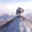

In [ ]:
cifar100_test_images[0]

In [ ]:
cifar100_test_labels[0]

array([49])

In [ ]:
unique, counts = np.unique(cifar100_test_labels, return_counts=True)
dict(zip(unique, counts))    ## Checking all the value of the train/test_labels

{np.int64(0): np.int64(100),
 np.int64(1): np.int64(100),
 np.int64(2): np.int64(100),
 np.int64(3): np.int64(100),
 np.int64(4): np.int64(100),
 np.int64(5): np.int64(100),
 np.int64(6): np.int64(100),
 np.int64(7): np.int64(100),
 np.int64(8): np.int64(100),
 np.int64(9): np.int64(100),
 np.int64(10): np.int64(100),
 np.int64(11): np.int64(100),
 np.int64(12): np.int64(100),
 np.int64(13): np.int64(100),
 np.int64(14): np.int64(100),
 np.int64(15): np.int64(100),
 np.int64(16): np.int64(100),
 np.int64(17): np.int64(100),
 np.int64(18): np.int64(100),
 np.int64(19): np.int64(100),
 np.int64(20): np.int64(100),
 np.int64(21): np.int64(100),
 np.int64(22): np.int64(100),
 np.int64(23): np.int64(100),
 np.int64(24): np.int64(100),
 np.int64(25): np.int64(100),
 np.int64(26): np.int64(100),
 np.int64(27): np.int64(100),
 np.int64(28): np.int64(100),
 np.int64(29): np.int64(100),
 np.int64(30): np.int64(100),
 np.int64(31): np.int64(100),
 np.int64(32): np.int64(100),
 np.int64(33): np.in

In [ ]:
cifar100_train_images = cifar100_train_images / 255.0
cifar100_test_images = cifar100_test_images / 255.0

In [ ]:
cifar100_train_images[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.76470588, 0.80392157, 0.75686275],
        [0.83137255, 0.87843137, 0.8       ],
        [0.71372549, 0.76078431, 0.65490196]],

       [[1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.66666667, 0.69019608, 0.58823529],
        [0.63137255, 0.65882353, 0.50980392],
        [0.57254902, 0.60392157, 0.44313725]],

       [[1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        [1.        , 1.        , 1.        ],
        ...,
        [0.74117647, 0.78039216, 0.6627451 ],
        [0.65098039, 0.69803922, 0.50980392],
        [0.4745098 , 0.52156863, 0.34117647]],

       ...,

       [[0.58039216, 0.7254902 , 0.30980392],
        [0.55686275, 0.71372549, 0.22352941],
        [0.54901961, 0

### Reshape Data

In [ ]:
cifar100_train_images = cifar100_train_images.reshape(-1, 32, 32, 3)
cifar100_test_images = cifar100_test_images.reshape(-1, 32, 32, 3)

In [ ]:
cifar100_train_images.shape

(50000, 32, 32, 3)

In [ ]:
cifar100_test_images[0]

array([[[0.78039216, 0.84313725, 0.97647059],
        [0.76862745, 0.82745098, 0.95686275],
        [0.76470588, 0.82352941, 0.95294118],
        ...,
        [0.84705882, 0.90588235, 0.98039216],
        [0.85098039, 0.90588235, 0.98039216],
        [0.87843137, 0.91764706, 0.98823529]],

       [[0.77254902, 0.82352941, 0.9372549 ],
        [0.76470588, 0.81568627, 0.93333333],
        [0.76470588, 0.82352941, 0.94117647],
        ...,
        [0.90588235, 0.95294118, 0.98039216],
        [0.91372549, 0.95294118, 0.98039216],
        [0.94509804, 0.96078431, 0.99215686]],

       [[0.87058824, 0.88627451, 0.96470588],
        [0.83529412, 0.8627451 , 0.94901961],
        [0.81960784, 0.85882353, 0.95294118],
        ...,
        [0.95294118, 0.98039216, 0.98431373],
        [0.95686275, 0.97647059, 0.98431373],
        [0.98039216, 0.98039216, 0.99215686]],

       ...,

       [[0.28235294, 0.28627451, 0.38823529],
        [0.27843137, 0.29019608, 0.4       ],
        [0.29019608, 0

#### 1.5) One-Hot Encode Labels

Convert class labels (0–99) into **one-hot encoded vectors** with 10 output classes, required for multi-class classification.

In [ ]:
cifar100_train_labels_one_hot = to_categorical(cifar100_train_labels, num_classes=100)
cifar100_test_labels_one_hot = to_categorical(cifar100_test_labels, num_classes=100)

#### 1.6) Verify Dataset Shapes

Print the shapes of images and labels after preprocessing to confirm everything is in the expected format.

In [ ]:
print("CIFAR-100 Training labels shape:", cifar100_train_labels_one_hot.shape)
print("CIFAR-100 Testing labels shape:", cifar100_test_labels_one_hot.shape)
print("CIFAR-100 Training labels shape:", cifar100_train_images.shape)
print("CIFAR-100 Testing labels shape:", cifar100_test_images.shape)

CIFAR-100 Training labels shape: (50000, 100)
CIFAR-100 Testing labels shape: (10000, 100)
CIFAR-100 Training labels shape: (50000, 32, 32, 3)
CIFAR-100 Testing labels shape: (10000, 32, 32, 3)


# Model Building

### Basic ANN Model

In [ ]:

cifar100_ann_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),   # Flatten 32x32x3 = 3072 into 1D vector
    keras.layers.Dense(512, activation='relu'),      # More neurons since CIFAR-100 is more complex
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(100, activation='softmax')    # 100 classes for CIFAR-100
])

cifar100_ann_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

cifar100_ann_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,730,404 (6.60 MB)

 Trainable params: 1,730,404 (6.60 MB)

 Non-trainable params: 0 (0.00 B)

### Basic CNN Model

In [ ]:

cifar100_cnn_model = keras.Sequential([
    # First conv block
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),

    # Second conv block
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    # Flatten + Dense layers
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),   # slightly bigger than MNIST model
    keras.layers.Dense(100, activation='softmax') # 100 classes for CIFAR-100
])

cifar100_cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

cifar100_cnn_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 327,332 (1.25 MB)

 Trainable params: 327,332 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

### Deeper CNN Model

In [ ]:
cifar100_deeper_cnn_model = keras.Sequential([
    # Block 1
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    # Block 2
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    # Block 3
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    # Flatten + Dense layers
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),   # increased size for CIFAR-100
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    # Output layer for 100 classes
    keras.layers.Dense(100, activation='softmax')
])

cifar100_deeper_cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

cifar100_deeper_cnn_model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 252,196 (985.14 KB)

 Trainable params: 251,236 (981.39 KB)

 Non-trainable params: 960 (3.75 KB)

# $ Training Model

### Training ANN Model

In [ ]:
from tensorflow import keras

# Callbacks --->
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model_checkpoint_cifar100_ann = ModelCheckpoint(
    filepath='best_cifar100_ann_model.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

# Train the ANN --->
print("Training ANN model on CIFAR-100...")
cifar100_ann_history = cifar100_ann_model.fit(
    cifar100_train_images,
    cifar100_train_labels_one_hot,   # one-hot encoded (100 classes)
    epochs=50,                       # CIFAR-100 is harder, so allow more epochs
    batch_size=128,                  # larger batch for speed
    validation_data=(cifar100_test_images, cifar100_test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_cifar100_ann]
)
print("CIFAR-100 ANN model training finished.")


Training ANN model on CIFAR-100...
Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0476 - loss: 4.3577
Epoch 1: val_loss improved from inf to 3.79360, saving model to best_cifar100_ann_model.weights.h5
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.0477 - loss: 4.3571 - val_accuracy: 0.1306 - val_loss: 3.7936
Epoch 2/50
377/391 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1325 - loss: 3.7326
Epoch 2: val_loss improved from 3.79360 to 3.66486, saving model to best_cifar100_ann_model.weights.h5
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1328 - loss: 3.7308 - val_accuracy: 0.1464 - val_loss: 3.6649
Epoch 3/50
384/391 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1591 - loss: 3.5654
Epoch 3: val_loss improved from 3.66486 to 3.51202, saving model to best_cifar100_ann_model.weights.h5
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1593 - loss: 3.5647 - val_accuracy: 0.1788 - val_loss: 3.5120
Epoch 4/50
386/391 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

### Training CNN Model

In [ ]:

# Callbacks --->
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model_checkpoint_cifar100_cnn = ModelCheckpoint(
    filepath='best_cifar100_cnn_model.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

# Train the CNN --->
print("Training CNN model on CIFAR-100...")
cifar100_cnn_history = cifar100_cnn_model.fit(
    cifar100_train_images,
    cifar100_train_labels_one_hot,   # 100-class one-hot labels
    epochs=50,
    batch_size=128,
    validation_data=(cifar100_test_images, cifar100_test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_cifar100_cnn]
)
print("CIFAR-100 CNN model training finished.")


Training CNN model on CIFAR-100...
Epoch 1/50
389/391 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5708 - loss: 1.5931
Epoch 1: val_loss improved from inf to 2.60078, saving model to best_cifar100_cnn_model.weights.h5
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5707 - loss: 1.5934 - val_accuracy: 0.3779 - val_loss: 2.6008
Epoch 2/50
381/391 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5849 - loss: 1.5522
Epoch 2: val_loss did not improve from 2.60078
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5845 - loss: 1.5533 - val_accuracy: 0.3854 - val_loss: 2.6111
Epoch 3/50
382/391 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5950 - loss: 1.5070
Epoch 3: val_loss did not improve from 2.60078
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5945 - loss: 1.5082 - val_accuracy: 0.3828 - val_loss: 2.6269
Epoch 4/50
381/391 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5987 - loss: 1.4735
Epoch 4: val_loss did not improve from 2.60078
391/391 ━━━━━━━━━━━━━━━━━━━━ 2

### Training Deeper CNN Model

In [ ]:
from tensorflow import keras

# Callbacks --->
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model_checkpoint_cifar100_deeper_cnn = ModelCheckpoint(
    filepath='best_cifar100_deeper_cnn_model.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

# Train the Deeper CNN --->
print("Training Deeper CNN model on CIFAR-100...")
cifar100_deeper_cnn_history = cifar100_deeper_cnn_model.fit(
    cifar100_train_images,
    cifar100_train_labels_one_hot,   # one-hot encoded for 100 classes
    epochs=80,                       # deeper CNN can train longer
    batch_size=128,
    validation_data=(cifar100_test_images, cifar100_test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_cifar100_deeper_cnn]
)
print("CIFAR-100 Deeper CNN model training finished.")


Training Deeper CNN model on CIFAR-100...
Epoch 1/80
384/391 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4719 - loss: 1.9579
Epoch 1: val_loss improved from inf to 1.99000, saving model to best_cifar100_deeper_cnn_model.weights.h5
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4718 - loss: 1.9585 - val_accuracy: 0.4742 - val_loss: 1.9900
Epoch 2/80
390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4762 - loss: 1.9517
Epoch 2: val_loss improved from 1.99000 to 1.98990, saving model to best_cifar100_deeper_cnn_model.weights.h5
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4762 - loss: 1.9518 - val_accuracy: 0.4711 - val_loss: 1.9899
Epoch 3/80
384/391 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4755 - loss: 1.9381
Epoch 3: val_loss improved from 1.98990 to 1.95338, saving model to best_cifar100_deeper_cnn_model.weights.h5
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4753 - loss: 1.9385 - val_accuracy: 0.4849 - val_loss: 1.9534
Epoch 4/80
386/391 ━━━━

# Model Evaluation

/tmp/ipython-input-1072163189.py:41: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


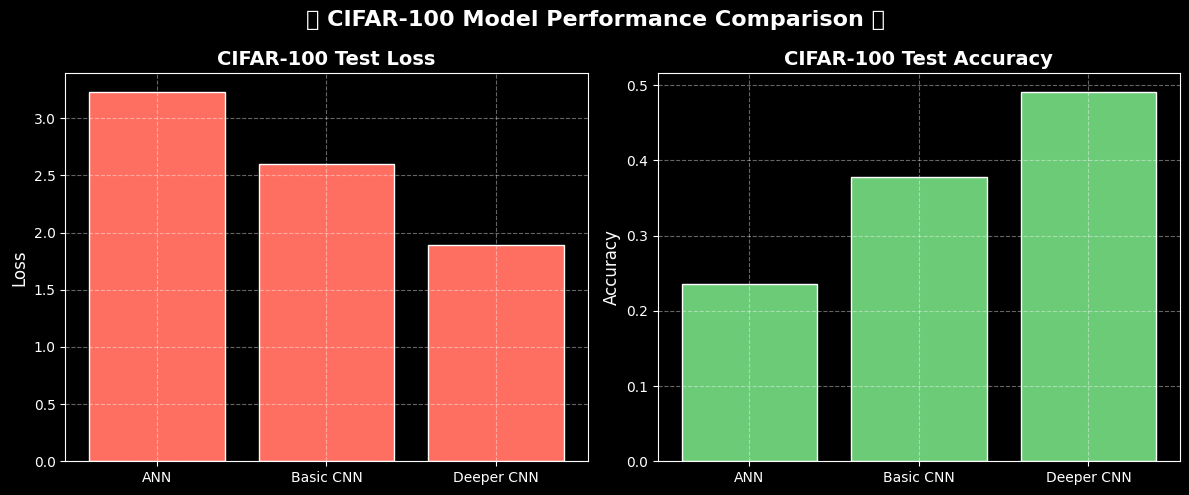

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow import keras

# --- Load the best saved weights ---
cifar100_ann_model.load_weights('best_cifar100_ann_model.weights.h5')
cifar100_cnn_model.load_weights('best_cifar100_cnn_model.weights.h5')
cifar100_deeper_cnn_model.load_weights('best_cifar100_deeper_cnn_model.weights.h5')

# --- Evaluate each model ---
loss_ann, accuracy_ann = cifar100_ann_model.evaluate(cifar100_test_images, cifar100_test_labels_one_hot, verbose=0)
loss_basic_cnn, accuracy_basic_cnn = cifar100_cnn_model.evaluate(cifar100_test_images, cifar100_test_labels_one_hot, verbose=0)
loss_deeper_cnn, accuracy_deeper_cnn = cifar100_deeper_cnn_model.evaluate(cifar100_test_images, cifar100_test_labels_one_hot, verbose=0)

# --- Data for plotting ---
models = ['ANN', 'Basic CNN', 'Deeper CNN']
losses = [loss_ann, loss_basic_cnn, loss_deeper_cnn]
accuracies = [accuracy_ann, accuracy_basic_cnn, accuracy_deeper_cnn]

# --- Dark mode style ---
plt.style.use("dark_background")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Loss plot
axes[0].bar(models, losses, color='#FF6F61', edgecolor='white')
axes[0].set_title('CIFAR-100 Test Loss', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.4)

# Accuracy plot
axes[1].bar(models, accuracies, color='#6BCB77', edgecolor='white')
axes[1].set_title('CIFAR-100 Test Accuracy', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.4)

# Overall title
plt.suptitle("✨ CIFAR-100 Model Performance Comparison ✨", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


## Confusion Matrix

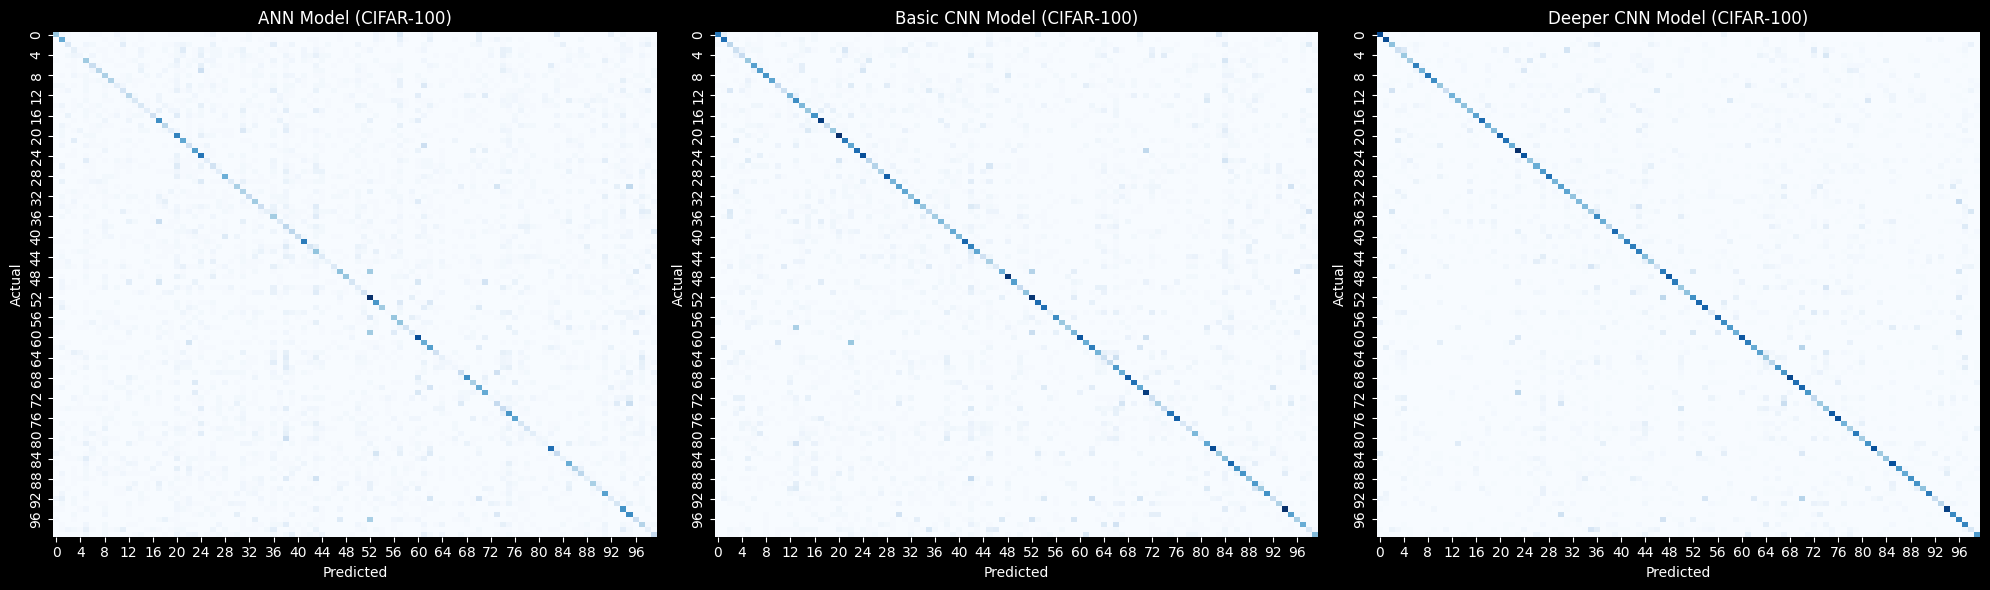

In [ ]:
from sklearn.metrics import confusion_matrix

# Predictions --->
ann_predictions = cifar100_ann_model.predict(cifar100_test_images, verbose=0)
basic_cnn_predictions = cifar100_cnn_model.predict(cifar100_test_images, verbose=0)
deeper_cnn_predictions = cifar100_deeper_cnn_model.predict(cifar100_test_images, verbose=0)

# Convert labels --->
test_labels_int = np.argmax(cifar100_test_labels_one_hot, axis=1)

ann_predicted_labels = np.argmax(ann_predictions, axis=1)
basic_cnn_predicted_labels = np.argmax(basic_cnn_predictions, axis=1)
deeper_cnn_predicted_labels = np.argmax(deeper_cnn_predictions, axis=1)

# Confusion matrices --->
cm_ann = confusion_matrix(test_labels_int, ann_predicted_labels)
cm_basic = confusion_matrix(test_labels_int, basic_cnn_predicted_labels)
cm_deeper = confusion_matrix(test_labels_int, deeper_cnn_predicted_labels)

# Plot side by side --->
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.heatmap(cm_ann, cmap="Blues", ax=axes[0], cbar=False)
axes[0].set_title("ANN Model (CIFAR-100)")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_basic, cmap="Blues", ax=axes[1], cbar=False)
axes[1].set_title("Basic CNN Model (CIFAR-100)")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

sns.heatmap(cm_deeper, cmap="Blues", ax=axes[2], cbar=False)
axes[2].set_title("Deeper CNN Model (CIFAR-100)")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()


# Model Comparision

- Created a dataframe to store **test loss** and **test accuracy** for ANN, Basic CNN, and Deeper CNN.  
- Plotted training history for each model (accuracy & loss vs. epochs).  
- Helps compare how models learn and generalize over time.

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Models dictionary: color + training history --->
models = {
    "ANN": ("cyan", cifar100_ann_history),
    "Basic CNN": ("magenta", cifar100_cnn_history),
    "Deeper CNN": ("yellow", cifar100_deeper_cnn_history)
}

# Performance results --->
performance_data = {
    'Model': ['ANN', 'Basic CNN', 'Deeper CNN'],
    'Test Loss': [loss_ann, loss_basic_cnn, loss_deeper_cnn],
    'Test Accuracy': [accuracy_ann, accuracy_basic_cnn, accuracy_deeper_cnn]
}

performance_df = pd.DataFrame(performance_data)

# Subplots for Accuracy & Loss --->
fig = make_subplots(rows=1, cols=2, subplot_titles=('Accuracy', 'Loss'))

for name, (color, history) in models.items():
    # Accuracy (train vs val)
    fig.add_trace(go.Scatter(y=history.history['accuracy'], mode='lines',
                             name=f"{name} Train Acc", line=dict(color=color, dash='solid')), row=1, col=1)
    fig.add_trace(go.Scatter(y=history.history['val_accuracy'], mode='lines',
                             name=f"{name} Val Acc", line=dict(color=color, dash='dot')), row=1, col=1)

    # Loss (train vs val)
    fig.add_trace(go.Scatter(y=history.history['loss'], mode='lines',
                             name=f"{name} Train Loss", line=dict(color=color, dash='solid')), row=1, col=2)
    fig.add_trace(go.Scatter(y=history.history['val_loss'], mode='lines',
                             name=f"{name} Val Loss", line=dict(color=color, dash='dot')), row=1, col=2)

# Layout --->
fig.update_layout(
    title_text="📊 CIFAR-100 Model Comparison: Accuracy & Loss (Train=Solid, Val=Dot)",
    height=500,
    width=1200,
    template="plotly_dark"
)

fig.show()


# Prediction

This code:
- Uses the trained **Basic CNN model** to predict on test images.  
- Identifies **correctly** and **incorrectly** classified samples.  
- Randomly selects 100 correct and 100 incorrect predictions.  
- Displays them in a **20×10 grid**:  
  - ✅ Correct predictions → **Green title** (only predicted label).  
  - ❌ Incorrect predictions → **Red title** (Predicted vs True label).

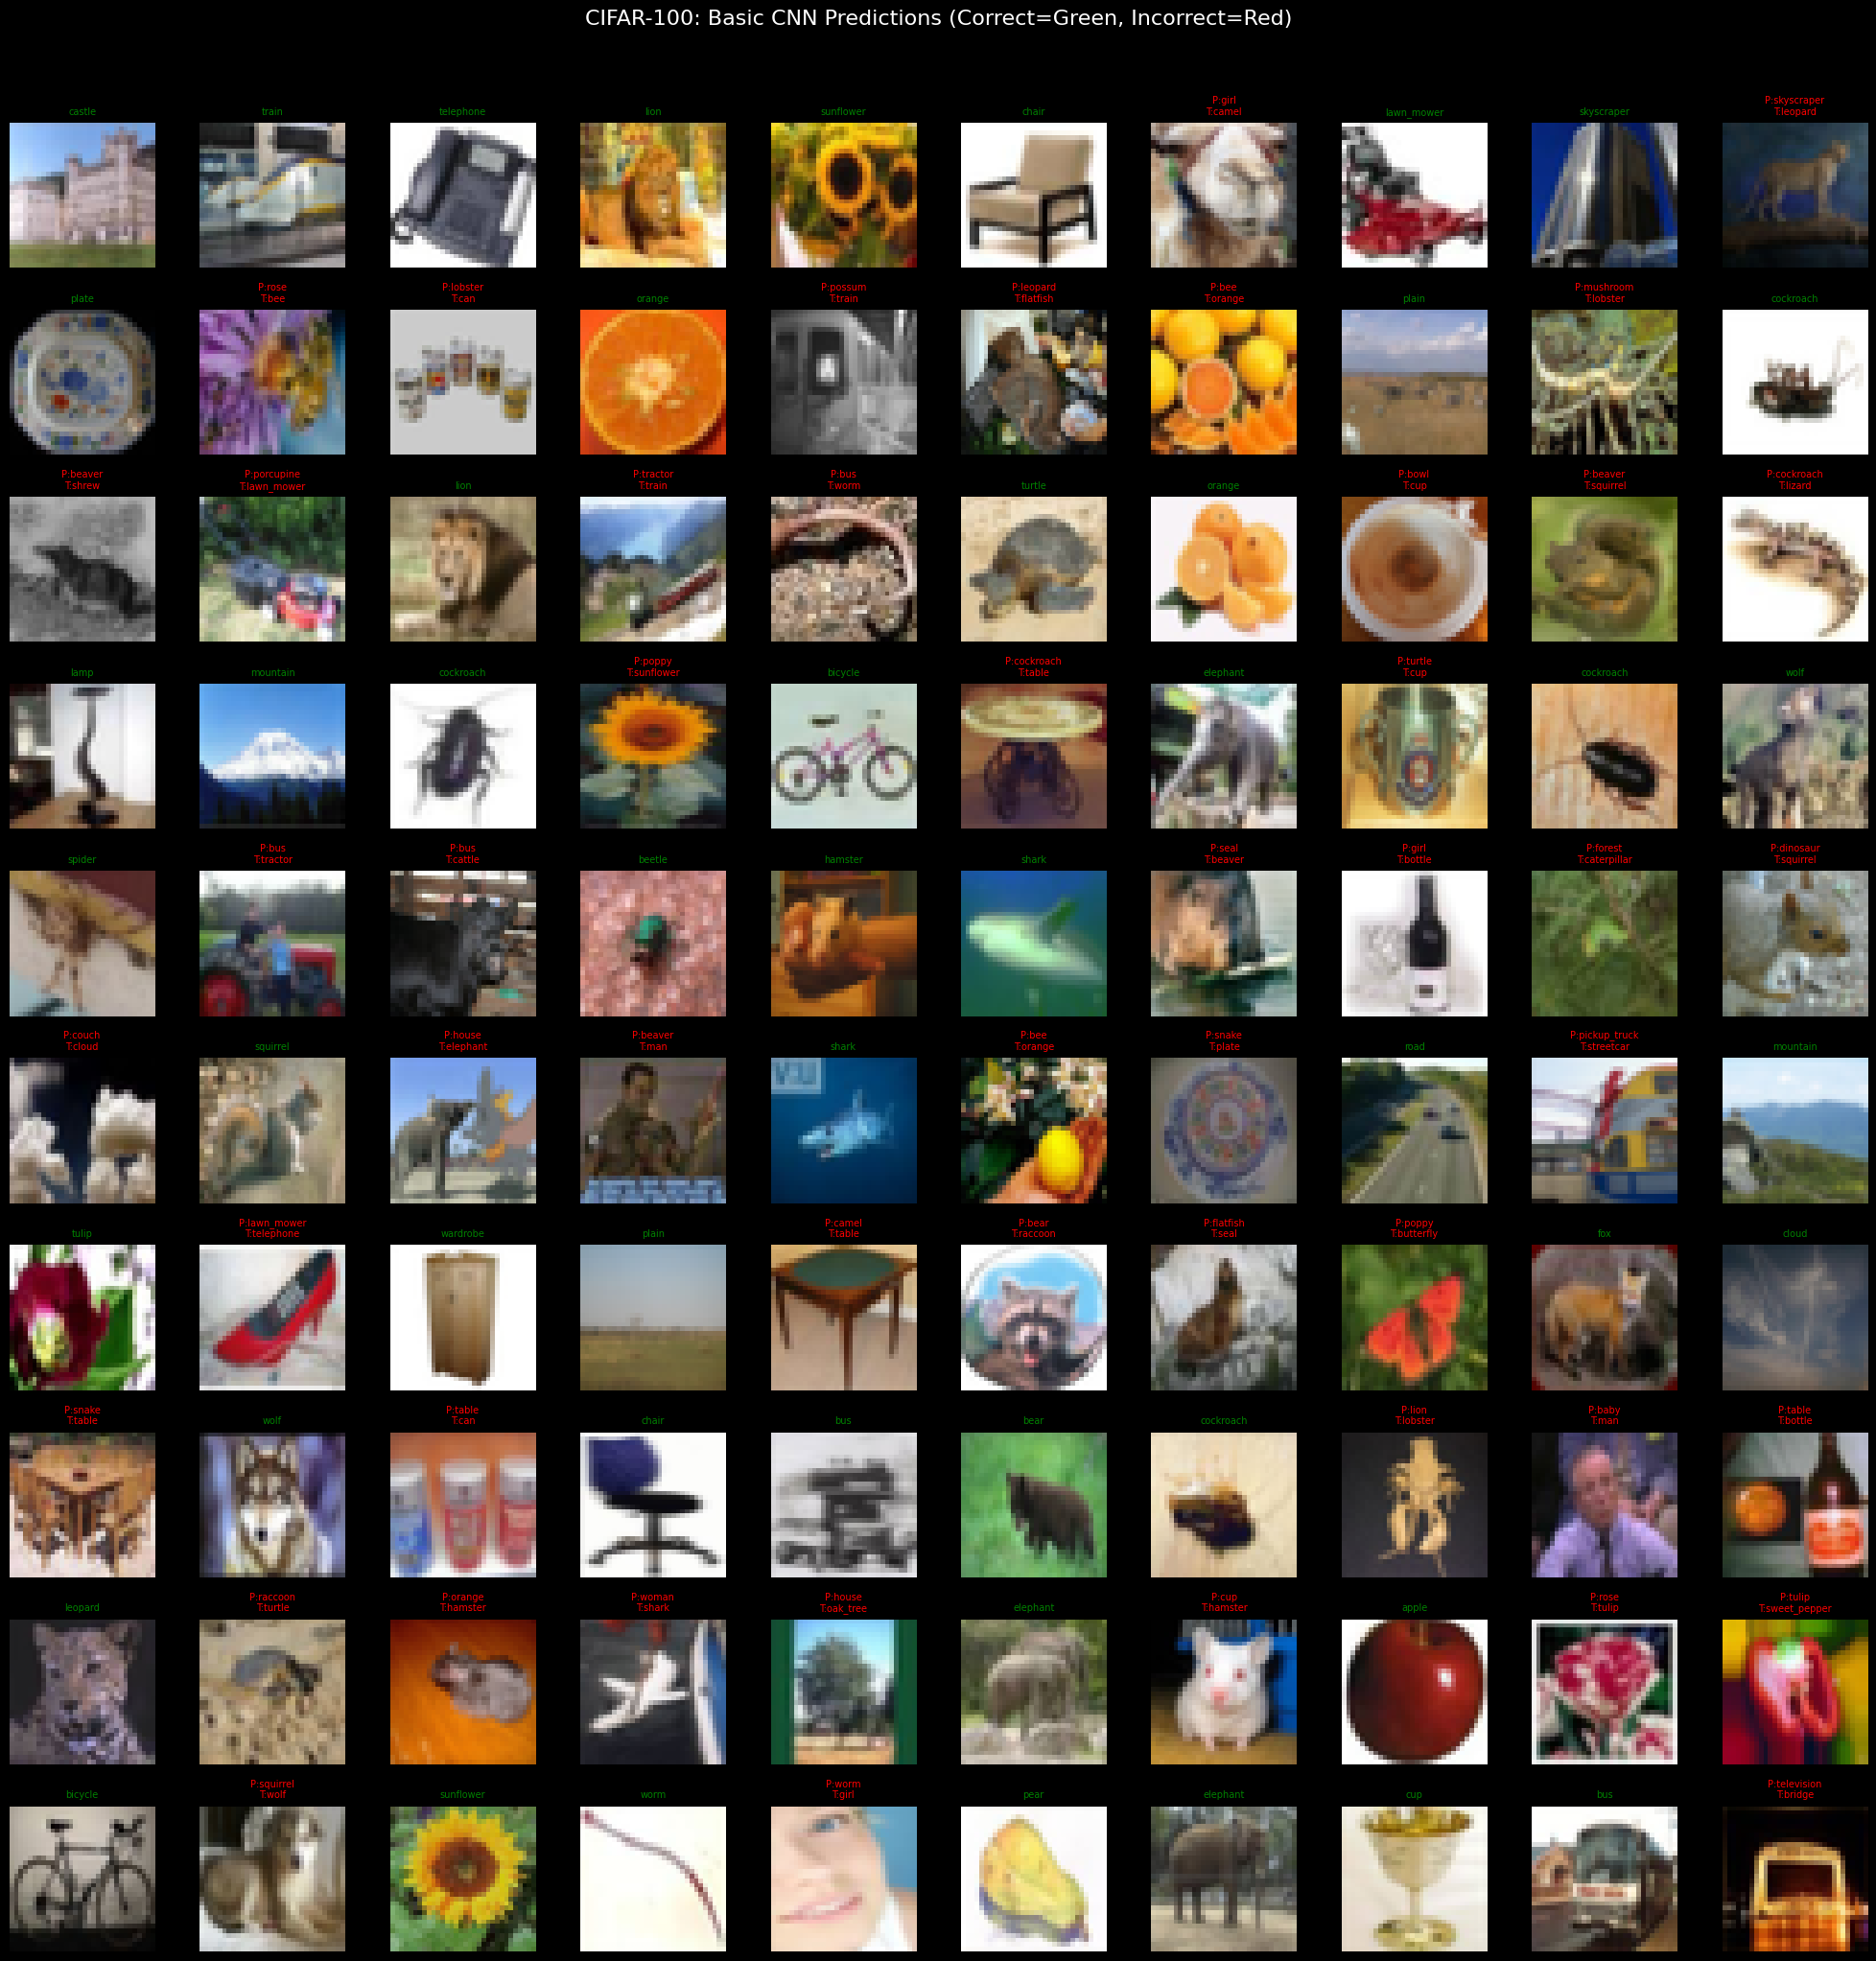

In [ ]:
from tensorflow.keras.datasets import cifar100

# CIFAR-100 class names (100 labels)
cifar100_classes = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel',
    'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train',
    'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

# Predictions --->
basic_cnn_predictions = cifar100_cnn_model.predict(cifar100_test_images, verbose=0)
basic_cnn_predicted_labels = np.argmax(basic_cnn_predictions, axis=1)

# True labels
test_labels_int = np.argmax(cifar100_test_labels_one_hot, axis=1)

# Correct vs incorrect
correctly_classified_indices = np.where(basic_cnn_predicted_labels == test_labels_int)[0]
incorrectly_classified_indices = np.where(basic_cnn_predicted_labels != test_labels_int)[0]

# Select subset
num_correct_to_show = min(50, len(correctly_classified_indices))
num_incorrect_to_show = min(50, len(incorrectly_classified_indices))

selected_correct_indices = np.random.choice(correctly_classified_indices, num_correct_to_show, replace=False)
selected_incorrect_indices = np.random.choice(incorrectly_classified_indices, num_incorrect_to_show, replace=False)

# Combine & shuffle
all_indices = np.concatenate((selected_correct_indices, selected_incorrect_indices))
np.random.shuffle(all_indices)

# Grid size
num_cols = 10
num_rows = 10
num_images_to_show = num_correct_to_show + num_incorrect_to_show

fig, axes = plt.subplots(num_rows, num_cols, figsize=(2 * num_cols, 2 * num_rows))
fig.suptitle("CIFAR-100: Basic CNN Predictions (Correct=Green, Incorrect=Red)", fontsize=16, y=1.02)

for i, idx in enumerate(all_indices[:num_images_to_show]):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].imshow(cifar100_test_images[idx])  # no reshape, already 32x32x3

    pred = cifar100_classes[basic_cnn_predicted_labels[idx]]
    true = cifar100_classes[test_labels_int[idx]]

    if basic_cnn_predicted_labels[idx] == test_labels_int[idx]:
        color = "green"
        title = f"{pred}"
    else:
        color = "red"
        title = f"P:{pred}\nT:{true}"

    axes[row, col].set_title(title, fontsize=7, color=color)
    axes[row, col].axis("off")

plt.tight_layout()
plt.show()
